In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [2]:
trade = pd.read_csv("../code/julia/model-data-trade.csv")

In [3]:
trade.head()

,trade,distance,border,bin375,bin750,bin1500,bin3000,bin6000,binmax,distbin,importer,exporter,sharedlanguage,europeancom,efta,trademodel
0,-7.410,9891.0,0,0,0,0,0,0,1,6.0,1,2,0,0,0,-7.814125
1,-10.074,10389.0,0,0,0,0,0,0,1,6.0,1,3,0,0,0,-10.325030
2,-5.826,10009.0,0,0,0,0,0,0,1,6.0,1,4,1,0,0,-5.559984
3,-8.206,9968.0,0,0,0,0,0,0,1,6.0,1,5,0,0,0,-8.537031
4,-6.461,9453.0,0,0,0,0,0,0,1,6.0,1,6,0,0,0,-7.065650


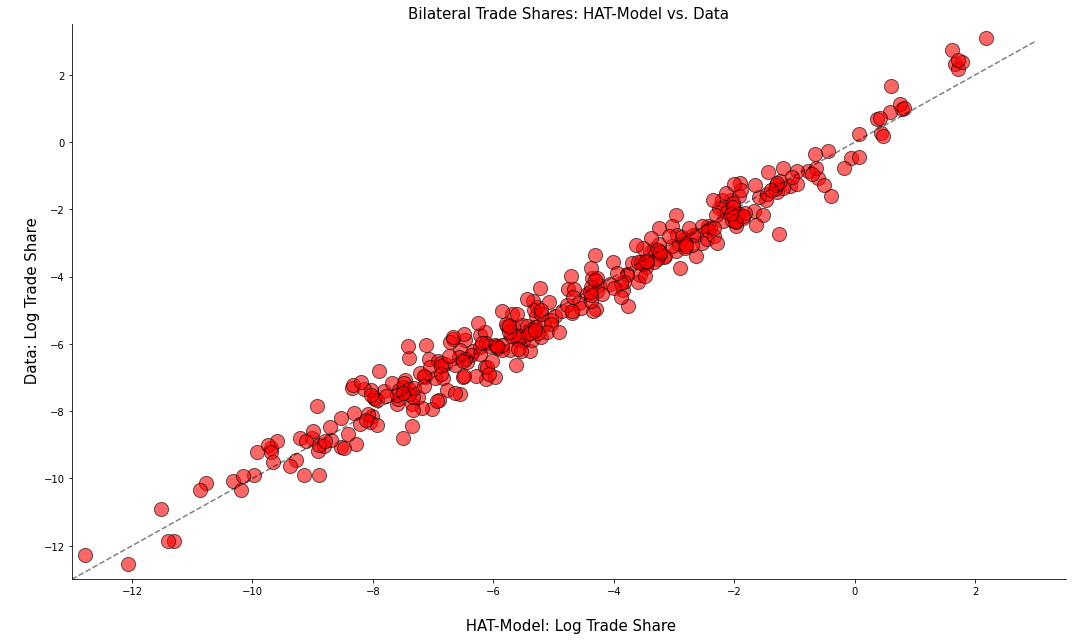

In [13]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.trade, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-13,4), range(-13,4), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: HAT-Model vs. Data", fontsize = 15)

ax.set_xlabel("\n HAT-Model: Log Trade Share", fontsize = 15)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 15)

plt.savefig("../notes/figures/trade-fit.pdf", bbox_inches = "tight")

ax.set_ylim(-13.0,3.5)
ax.set_xlim(-13.0,3.5)

plt.show()

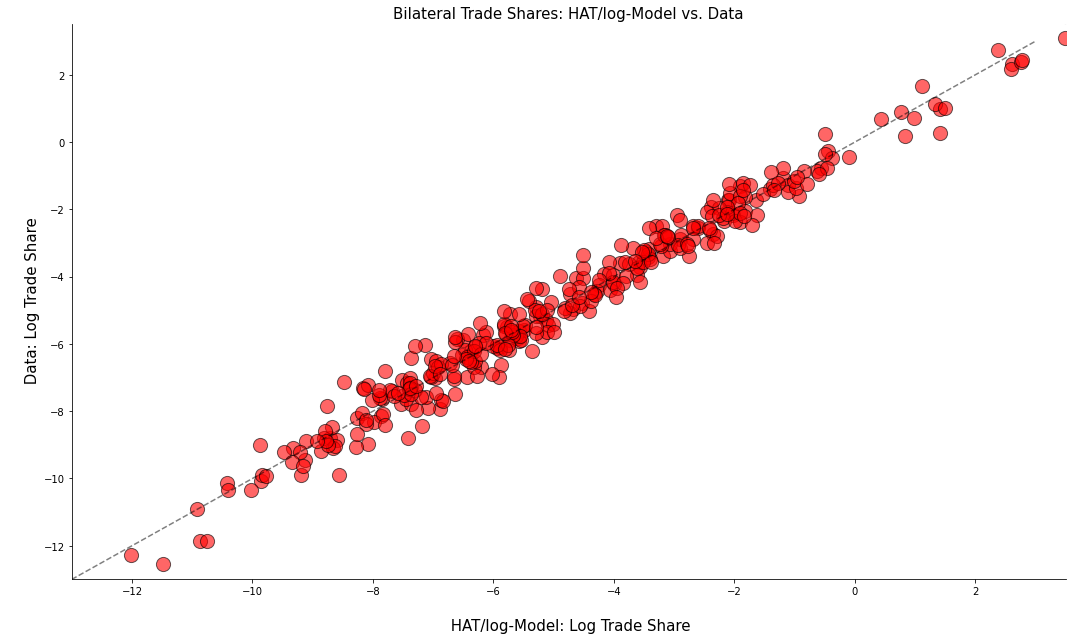

In [16]:
trade = pd.read_csv("../code/julia/log-model-data-trade.csv")

fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.trade, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-13,4), range(-13,4), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: HAT/log-Model vs. Data", fontsize = 15)

ax.set_xlabel("\n HAT/log-Model: Log Trade Share", fontsize = 15)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 15)

plt.savefig("../notes/figures/log-trade-fit.pdf", bbox_inches = "tight")

ax.set_ylim(-13.0,3.5)
ax.set_xlim(-13.0,3.5)

plt.show()